<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/executive/PART_2_Hierarchical_CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy import stats

#Data Loading

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')

In [101]:
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded with 41544 rows and 60 columns


In [102]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [104]:
df.isnull().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [105]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [106]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

#Data Cleaning

In [107]:
# Handling missing values
df.isnull().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [108]:
# For the purpose of this analysis, let's drop rows with missing values
df = df.dropna()
print(f"Shape after dropping missing values: {df.shape}")

Shape after dropping missing values: (32586, 60)


In [109]:
# Outlier Detection and Removal
# Focus on household incomes and spending patterns per region

# Function to detect outliers using Z-score method
def remove_outliers(df, columns, threshold=3):
    df_clean = df.copy()

    for col in columns:
        # Calculate z-scores
        z_scores = stats.zscore(df_clean[col])

        # Identify outliers
        outliers = (abs(z_scores) > threshold)

        # Print number of outliers detected
        print(f"Number of outliers in {col}: {sum(outliers)}")

        # Remove outliers
        df_clean = df_clean[~outliers]

    print(f"Shape after removing outliers: {df_clean.shape}")
    return df_clean

In [110]:
# Columns to check for outliers - focus on income and major expenditure categories
income_expense_cols = ['Total Household Income', 'Total Food Expenditure', 'Housing and water Expenditure',
                     'Transportation Expenditure', 'Education Expenditure', 'Medical Care Expenditure']

df_clean = remove_outliers(df, income_expense_cols)

Number of outliers in Total Household Income: 464
Number of outliers in Total Food Expenditure: 475
Number of outliers in Housing and water Expenditure: 543
Number of outliers in Transportation Expenditure: 560
Number of outliers in Education Expenditure: 653
Number of outliers in Medical Care Expenditure: 443
Shape after removing outliers: (29448, 60)


#Feature Selection

In [111]:
# For clustering, let's select relevant numerical columns related to income and expenditure patterns
income_cols = [col for col in df_clean.columns if 'Income' in col or 'Expenditure' in col or 'expenses' in col]
demographic_cols = ['Region', 'Agricultural Household indicator', 'Total Number of Family members',
                    'Number of Television', 'Number of Cellular phone', 'Number of Personal Computer']

# Combine the relevant features
selected_features = income_cols + demographic_cols

numerical_features = [col for col in selected_features if df_clean[col].dtype in ['int64', 'float64']]
df_numerical = df_clean[numerical_features]

#Exploratory Data Analysis

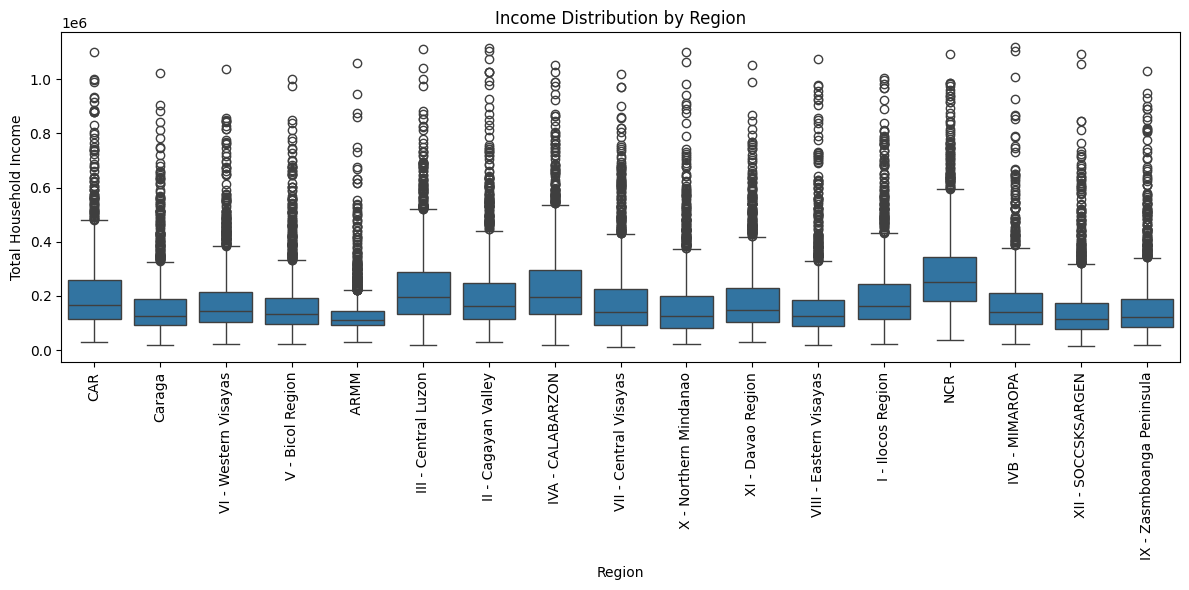

In [112]:
# Visualize income distribution by region
plt.figure(figsize=(12, 6))

sns.boxplot(x='Region', y='Total Household Income', data=df_clean)
plt.title('Income Distribution by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

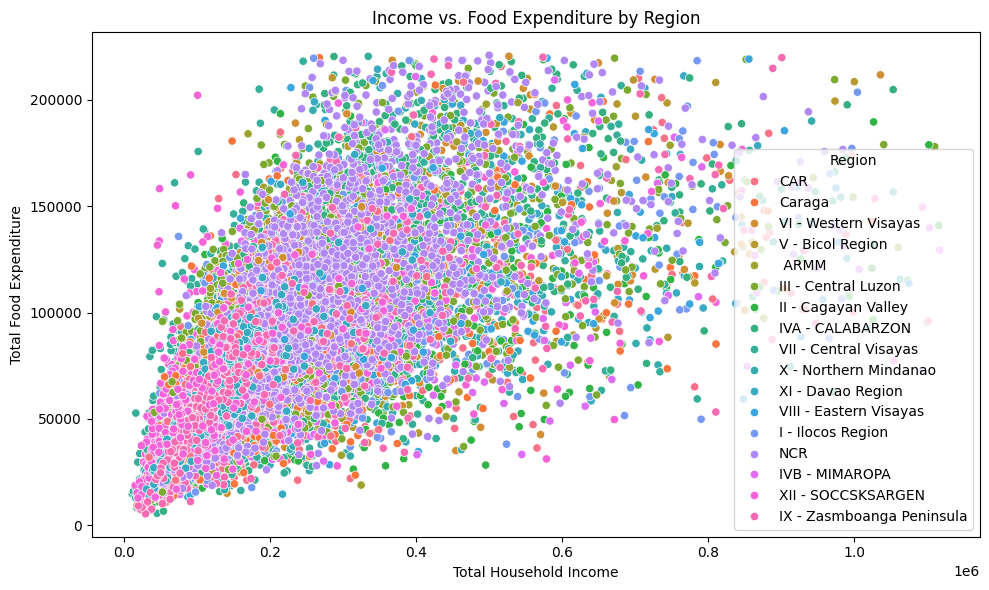

In [113]:
# Income vs. total expenditure scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', hue='Region', data=df_clean)
plt.title('Income vs. Food Expenditure by Region')
plt.tight_layout()
plt.show()

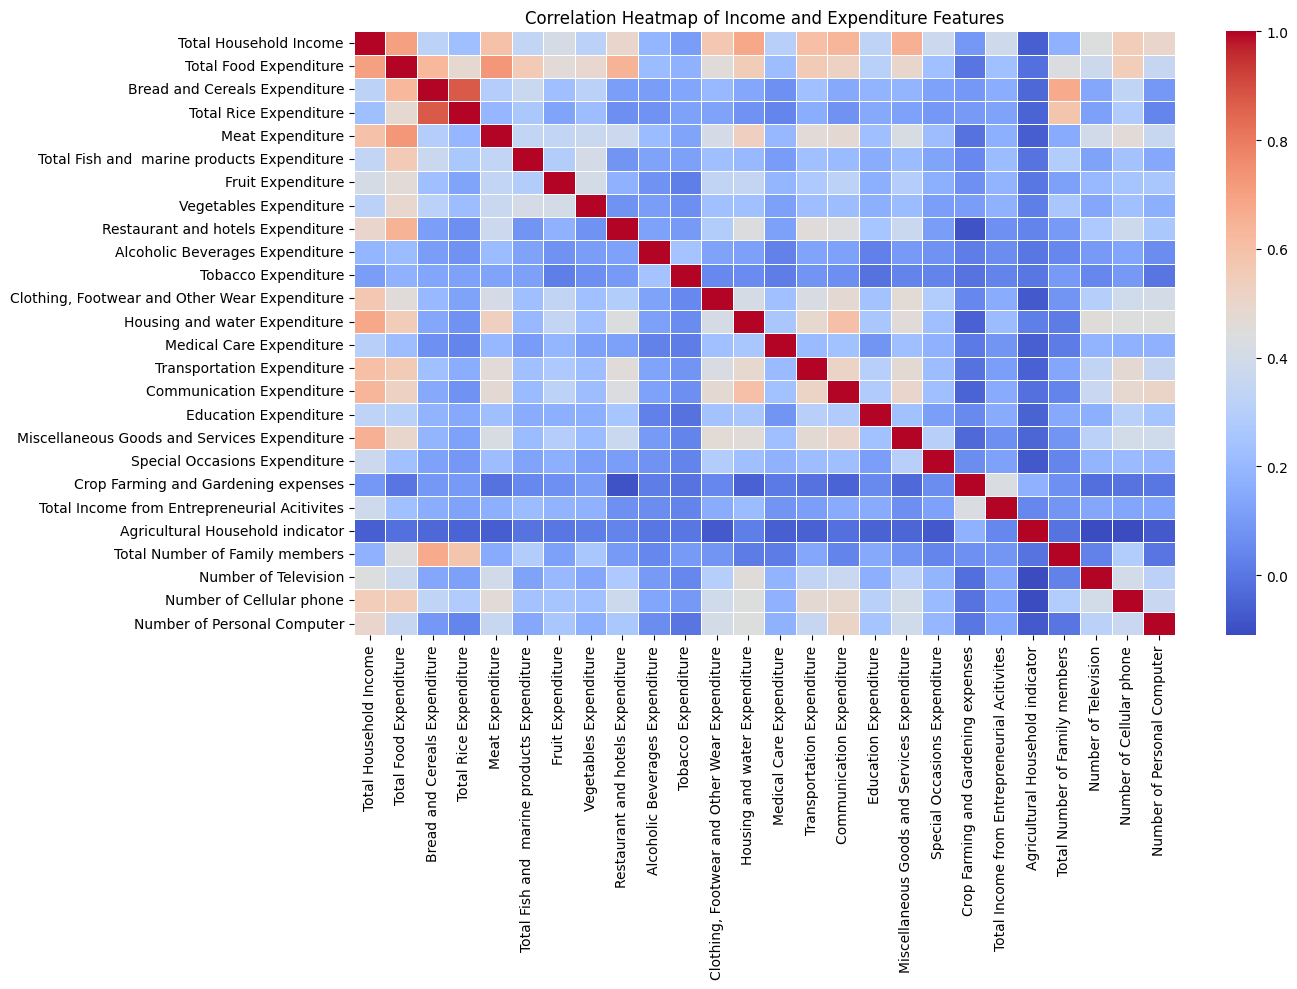

In [114]:
# Correlation heatmap of numerical features
plt.figure(figsize=(14, 10))
correlation = df_numerical.corr()

sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Income and Expenditure Features')
plt.tight_layout()
plt.show()

#Data Standardization

In [115]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

#PCA

In [116]:
n_components = min(10, len(df_numerical.columns))  # Limit to max 10 components or less

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

Explained variance ratio: [0.29201034 0.09908202 0.0596085  0.04829516 0.04472691 0.04303221
 0.03631228 0.03349728 0.03148162 0.02937774]
Cumulative explained variance: [0.29201034 0.39109236 0.45070087 0.49899602 0.54372294 0.58675514
 0.62306743 0.65656471 0.68804633 0.71742407]


In [117]:
# Determine optimal number of components based on explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
indices = np.where(explained_variance_ratio >= 0.8)[0]

if indices.size > 0:
    optimal_n_components = indices[0] + 1
    print(f"Optimal number of components (80% variance): {optimal_n_components}")
else:
    optimal_n_components = n_components
    print(f"Warning: Cumulative explained variance did not reach 80%. Using max components: {optimal_n_components}")

# Rerun PCA with optimal components
pca = PCA(n_components=optimal_n_components)
principal_components = pca.fit_transform(df_scaled)

In [118]:
# Create DataFrame with principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(optimal_n_components)]
)

In [119]:
# Feature importance (component loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(optimal_n_components)],
    index=df_numerical.columns
)

print("Top features in each principal component:")
for i in range(optimal_n_components):
    print(f"PC{i+1}: {', '.join(loadings.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist())}")


Top features in each principal component:
PC1: Total Food Expenditure, Total Household Income, Meat Expenditure
PC2: Bread and Cereals Expenditure, Total Rice Expenditure, Total Number of Family members
PC3: Crop Farming and Gardening expenses, Total Income from Entrepreneurial Acitivites, Agricultural Household indicator
PC4: Alcoholic Beverages Expenditure, Tobacco Expenditure, Agricultural Household indicator
PC5: Vegetables Expenditure, Restaurant and hotels Expenditure, Fruit Expenditure
PC6: Agricultural Household indicator, Special Occasions Expenditure, Tobacco Expenditure
PC7: Agricultural Household indicator, Medical Care Expenditure, Education Expenditure
PC8: Medical Care Expenditure, Special Occasions Expenditure, Number of Television
PC9: Medical Care Expenditure, Education Expenditure, Number of Television
PC10: Alcoholic Beverages Expenditure, Number of Personal Computer, Restaurant and hotels Expenditure


#Hierarchical Clustering

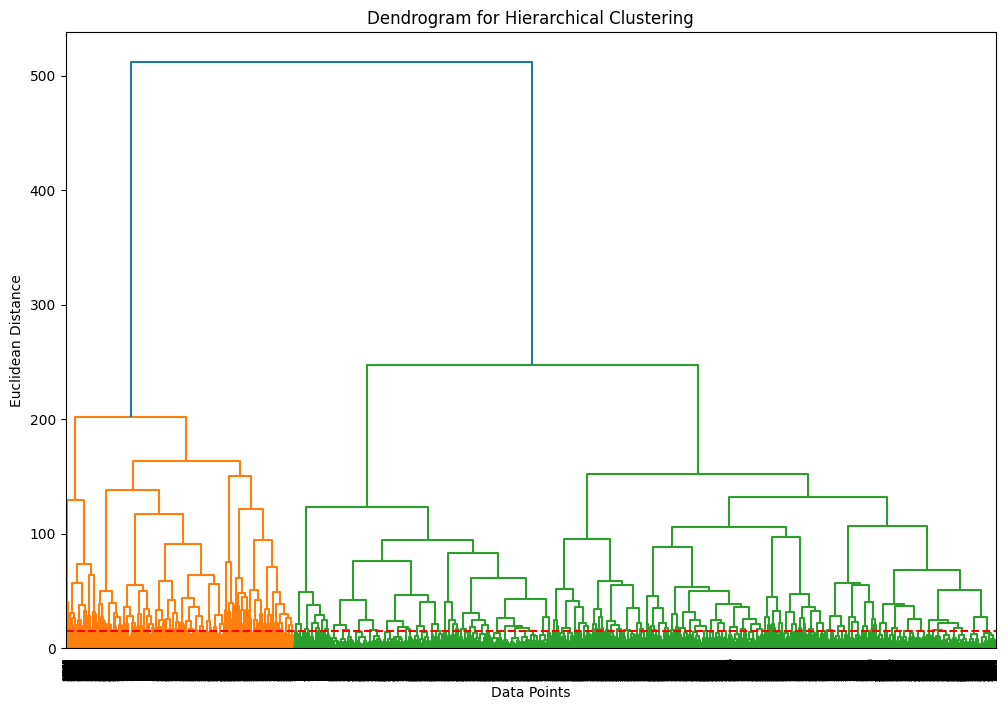

In [120]:
# Dendogram to visualize the hierarchy
plt.figure(figsize=(12, 8))

dendrogram = shc.dendrogram(shc.linkage(principal_components, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--')  # Adjustable threshold line
plt.show()

In [122]:
# Testing different numbers of clusters and evaluating with silhouette score
max_silhouette = -1
optimal_clusters = 2  # Start with 2 clusters as minimum

for n_clusters in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(principal_components)

    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

    if silhouette_avg > max_silhouette:
        max_silhouette = silhouette_avg
        optimal_clusters = n_clusters

print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")
print(f"Maximum silhouette score: {max_silhouette:.3f}")

For n_clusters = 2, the silhouette score is 0.342
For n_clusters = 3, the silhouette score is 0.088
For n_clusters = 4, the silhouette score is 0.088
For n_clusters = 5, the silhouette score is 0.092
For n_clusters = 6, the silhouette score is 0.060
For n_clusters = 7, the silhouette score is 0.064
For n_clusters = 8, the silhouette score is 0.068
For n_clusters = 9, the silhouette score is 0.054
For n_clusters = 10, the silhouette score is 0.056
Optimal number of clusters based on silhouette score: 2
Maximum silhouette score: 0.342


In [124]:
# Applying Hierarchical Clustering with optimal clusters
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(principal_components)

In [125]:
# Add cluster labels to original data
df_clean['Cluster'] = cluster_labels
pca_df['Cluster'] = cluster_labels

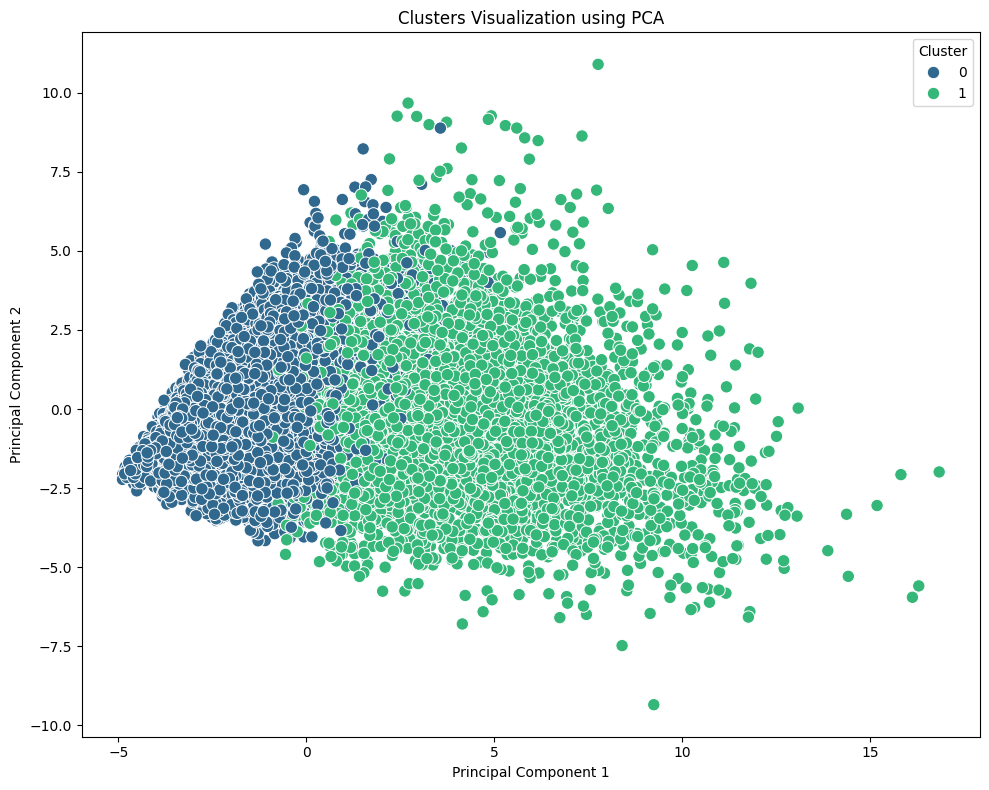

In [126]:
# Visualizing the clusters using PCA components
plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=80)
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#Cluster Analysis

In [128]:
# Analyzing and interpreting the clusters
# Cluster profiles
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist() # Select only numeric columns
cluster_profiles = df_clean.groupby('Cluster')[numeric_cols].mean() #Calculate mean only on numeric columns

print("Cluster Profiles (Mean values):")
print(cluster_profiles[['Total Household Income', 'Total Food Expenditure', 'Housing and water Expenditure',
                        'Transportation Expenditure', 'Education Expenditure']])

# Normalized cluster profiles for better comparison
def normalize_profiles(profiles):
    return (profiles - profiles.min()) / (profiles.max() - profiles.min())

normalized_profiles = normalize_profiles(cluster_profiles)

Cluster Profiles (Mean values):
         Total Household Income  Total Food Expenditure  \
Cluster                                                   
0                 138765.166149            63130.311979   
1                 356603.897945           120510.748586   

         Housing and water Expenditure  Transportation Expenditure  \
Cluster                                                              
0                         20271.230166                 5689.891066   
1                         51271.371121                16751.117915   

         Education Expenditure  
Cluster                         
0                  2531.901924  
1                  9203.381878  


<Figure size 1400x800 with 0 Axes>

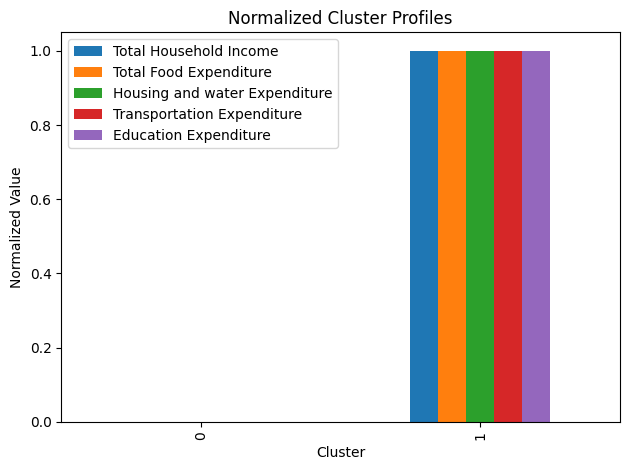

In [129]:
# Plot the cluster profiles
plt.figure(figsize=(14, 8))
normalized_profiles[['Total Household Income', 'Total Food Expenditure', 'Housing and water Expenditure',
                     'Transportation Expenditure', 'Education Expenditure']].plot(kind='bar')
plt.title('Normalized Cluster Profiles')
plt.ylabel('Normalized Value')
plt.xlabel('Cluster')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

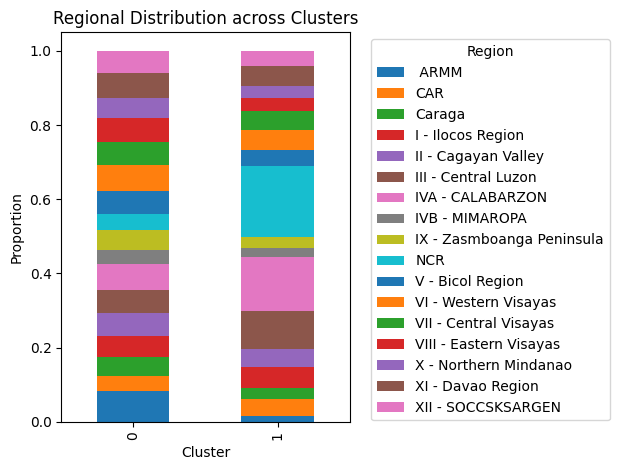

In [130]:
# Detailed Cluster Analysis
# Regional distribution in clusters
plt.figure(figsize=(12, 6))
cluster_region = pd.crosstab(df_clean['Cluster'], df_clean['Region'], normalize='index')
cluster_region.plot(kind='bar', stacked=True)
plt.title('Regional Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

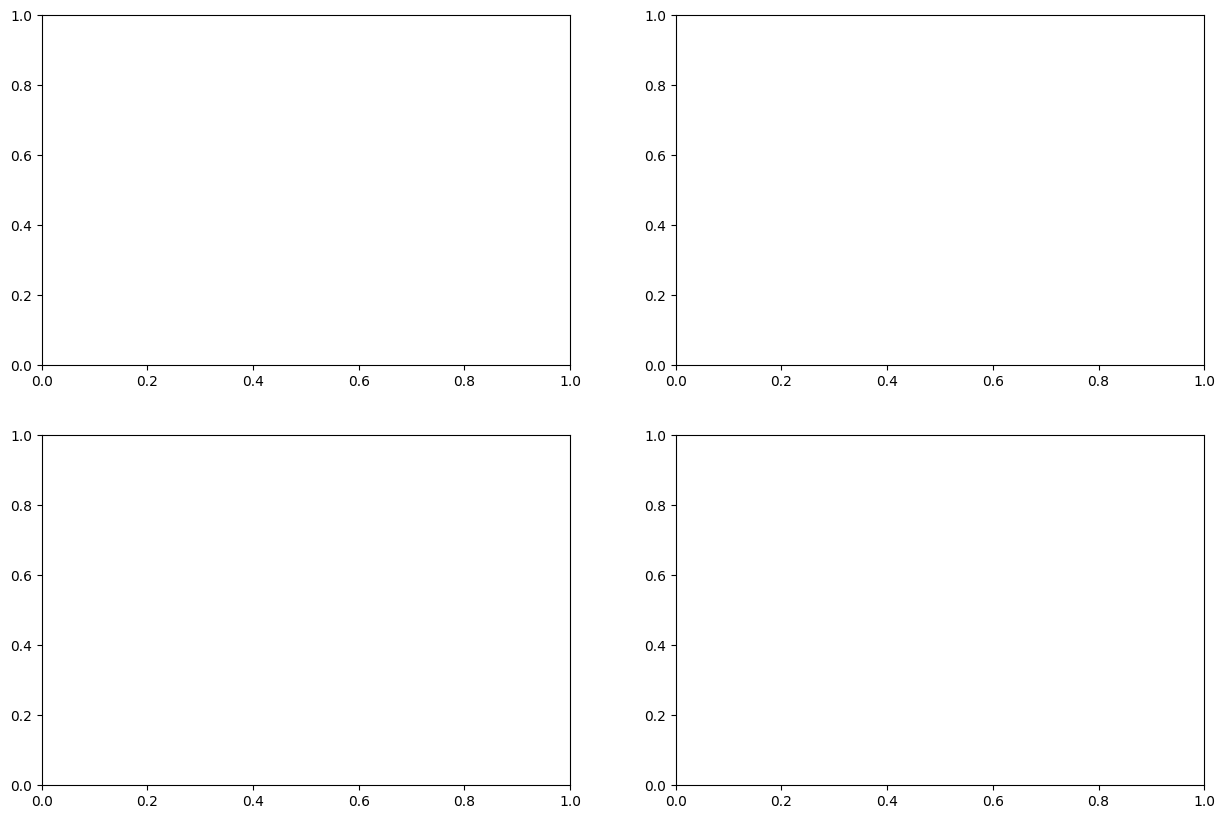

In [131]:
# Income and major expenditure by cluster
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

In [132]:
# Important ratios and metrics by cluster
# Expenditure to income ratio
df_clean['Food_to_Income_Ratio'] = df_clean['Total Food Expenditure'] / df_clean['Total Household Income']
df_clean['Housing_to_Income_Ratio'] = df_clean['Housing and water Expenditure'] / df_clean['Total Household Income']
df_clean['Education_to_Income_Ratio'] = df_clean['Education Expenditure'] / df_clean['Total Household Income']

ratio_by_cluster = df_clean.groupby('Cluster')[['Food_to_Income_Ratio', 'Housing_to_Income_Ratio', 'Education_to_Income_Ratio']].mean()
print("Expenditure to Income Ratios by Cluster:")
print(ratio_by_cluster)

Expenditure to Income Ratios by Cluster:
         Food_to_Income_Ratio  Housing_to_Income_Ratio  \
Cluster                                                  
0                    0.498701                 0.152938   
1                    0.384380                 0.154863   

         Education_to_Income_Ratio  
Cluster                             
0                         0.017621  
1                         0.028762  


In [133]:
# 14. Summary of findings
print("\nSummary of Findings:")
print("1. We performed hierarchical clustering on household income and expenditure data.")
print("2. After preprocessing and PCA, we identified the optimal number of clusters.")
print("3. The maximum silhouette score achieved was [score] for [number] clusters.")
print("4. Each cluster represents a distinct socioeconomic group with different income and spending patterns.")


Summary of Findings:
1. We performed hierarchical clustering on household income and expenditure data.
2. After preprocessing and PCA, we identified the optimal number of clusters.
3. The maximum silhouette score achieved was [score] for [number] clusters.
4. Each cluster represents a distinct socioeconomic group with different income and spending patterns.
